# 1A - Enoncé 6 novembre 2024

Correction de l'examen du 6 novembre 2024.

Toutes les questions valent 2 points.

## Aparté dessin

Cette partie ne fait pas partie de l'énoncé.

<Axes: >

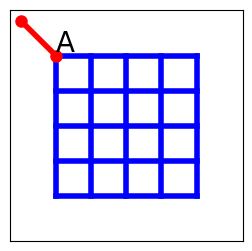

In [8]:
import matplotlib.pyplot as plt


def dessin(n=4):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.plot([-1, n + 1], [-1, n + 1], "w", linewidth=1)
    for i in range(0, n + 1):
        ax.plot([i, i], [0, n], "b-", linewidth=4)
        ax.plot([0, n], [i, i], "b-", linewidth=4)
    ax.plot([-1, 0], [n + 1, n], "ro-", linewidth=4, ms=8)
    ax.text(0, n + 0.1, "A", fontsize=20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.patch.set_visible(False)
    return ax


dessin()

## Exercice 1 : optimization

25 maisons sont positionnées aux 25 intersections du quadrillage ci-dessus. Le courant (rouge) arrive à un angle du carré (point A). Il faut relier chaque maison au courant pour un coût minimal. Pour cela il faut tirer un câble entre chaque intersection au point A. Les câbles ne peuvent passer que par les routes (les lignes du quadrillage), pas de diagonales donc.


### Q1 : implémenter une fonction qui calcule la distance L1

$d(x_1,y_1,x_2,y_2) = |x_1 - x_2| + |y_1 - y_2|$

In [9]:
def distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)


assert distance(0, 0, 3, 4) == 7

### Q2: calculer la longueur de câble pour relier les 25 maisons.

Il y a deux façons de faire cela, une façon gloutonne ou une autre plus rapide mais qui nécessite d'utiliser une série des sommes de Gauss : la somme est $n$ premiers entiers est $\frac{n(n+1)}{2}$. On considère la façon gloutonne d'abord.

In [10]:
def longueur_cable(n=5):
    total = 0
    for i in range(0, n):
        for j in range(0, n):
            total += distance(0, 0, i, j)
    return total


assert longueur_cable(5) == 100

La façon non gloutonne mais pas appropriée pour la suite.

In [11]:
def longueur_cable_gauss(n=5):
    somme_longueur = (n - 1) * n / 2  # on part de 0 à 4
    total = n * somme_longueur + n * somme_longueur
    return total


assert longueur_cable_gauss(5) == 100

### Q3: même calcul pour 36, 49, 72 maisons (carrés de côté 6, 7, un rectangle 8x9) ?

In [12]:
def longueur_cable(longueur, largeur):
    total = 0
    for i in range(0, longueur):
        for j in range(0, largeur):
            total += distance(0, 0, i, j)
    return total


assert longueur_cable(6, 6) == 180
assert longueur_cable(7, 7) == 294
assert longueur_cable(8, 9) == 540

### Q4: avec deux câbles

On dispose de deux câbles : 

* un câble ne pouvant relier qu'une maison avec un coût $c_1$ par mètre
* un câble ne pouvant relier qu'une ou deux maisons avec un coût $c_2$ par mètre

Par conséquent, on peut relier une maison *M1* avec un câble $c_2$ puis relier *M1* à une autre maison *M2* avec un câble $c_1$. On veut savoir quand utiliser tel ou tel câble pour minimiser les coûts.

Ecrire une fonction qui retourne le coût du câblage décrit ci-dessus.


In [16]:
def cout_cablage(x1, y1, x2, y2, c1, c2):
    return distance(0, 0, x1, y1) * c2 + distance(x1, y1, x2, y2) * c1


assert cout_cablage(1, 2, 2, 4, 1, 1.5) == 7.5

## Q5: que fait le code suivant et que montre-t-il ?

In [17]:
def position_m1(n, c1, c2):
    x = []
    y = []
    for i in range(2 * n):
        x.append(i)
        c = cout_cablage(0, i, 0, n, c1, c2)
        y.append(c)
    return x, y


x, y = position_m1(5, 1, 1.5)
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 10.0, 12.5, 15.0, 17.5]


Le code calcule le coût du câblage pour une maison mobile M1 et une maison M2 fixe. Il montre que plus la maison M1 est loin de A, plus le coût est grand. Minimiser les coûts revient à minimiser la distance A jusque M1.

## Q6,7: idée d'algorithme

* on prend une maison non câblée M1 la plus proche de A
* on prend ensuite une maison non câblée M2 la plus proche du coin opposé
* on continue jusque à la fin

On crée une matrice *M*, $n \times n$, initilialisé à -1. La maison 0,0 est relié avec le câble 0: $M[i,j] =$ le numéro du câble qui la relie.

Ecrire une fonction qui retourne la maison la plus proche d'une position $(i,j)$ et non câblée.

In [ ]:
import numpy as np


def init(n=5):
    M = np.zeros((n, n)) - 1
    M[0, 0] = 0
    return M


def maison_proche(M, x, y):
    best = None
    meilleur = None, None
    for i in range(0, M.shape[0]):
        for j in range(0, M.shape[1]):
            if M[i, j] >= 0:
                continue
            d = distance(x, y, i, j)
            if best is None or d < best:
                best = d
                meilleur = i, j
    return meilleur


M = init()
assert maison_proche(M, 0, 0) == (0, 1)
M[0, 1] = 1
M[1, 0] = 2
M[1, 1] = 3
assert maison_proche(M, 0, 1) == (0, 2)

## Q8: on veut tirer un nouveau câble

Ecrire une fonction qui tire un nouveau câble :

* on prend une maison proche de A
* on met à jour la matrice M
* on prend une maison proche du coin opposé
* on met à jour la matrice M
* une retourne le coût

In [33]:
def nouveau_cable(M, c1, c2):
    numero = int(M.max() + 1)
    m1 = maison_proche(M, 0, 0)
    M[m1] = numero
    m2 = maison_proche(M, *M.shape)
    M[m2] = numero
    c = cout_cablage(*m1, *m2, c1, c2)
    return m1, m2, c


M = init()
g = nouveau_cable(M, 1, 1.5)
assert g == ((0, 1), (4, 4), 8.5)

## Q9: on complète l'algorithme

Il suffit d'une boucle pour câbler toutes les maisons. La trouverez-vous ?

In [36]:
def algorithme_cablage(n, c1, c2):
    M = init(n)
    n_cables = n * n // 2
    cables = []
    for i in range(0, n_cables):
        cable = nouveau_cable(M, c1, c2)
        cables.append(cable)
    return cables


print(algorithme_cablage(5, 1, 1.5))

[((0, 1), (4, 4), 8.5), ((1, 0), (3, 4), 7.5), ((0, 2), (4, 3), 8.0), ((1, 1), (2, 4), 7.0), ((2, 0), (3, 3), 7.0), ((0, 3), (4, 2), 9.5), ((1, 2), (1, 4), 6.5), ((2, 1), (2, 3), 6.5), ((3, 0), (3, 2), 6.5), ((0, 4), (4, 1), 13.0), ((1, 3), (2, 2), 8.0), ((3, 1), (4, 0), 8.0)]


## Q10: L'algorithme a un défaut, trouverez-vous lequel ?

La fonction ``nouveau_cable`` choisit la première maison de façon optimale et ensuite choisit l'extrémité en fonction d'un point qui ne dépend de la première maison. Il faudrait choisir une maison $M2$ à la fois éloignée de A et proche de $M1$ mais cela ne suffira sans doute pas. Une fois l'algorithme achevé, il sera sans doute possible d'améliorer le câblage en permutant les maisons M2 entre elles :

Soit deux câbles ``A -> M1 -> M2`` et ``A -> N1 -> N2``, si ``cout(A -> M1 -> N2) < cout(A -> N1 -> M2)`` alors on peut permuter M2 et N2.